In [166]:
import numpy as np
import matplotlib.pyplot as plt
import random

Usando la funzione f(x) = x - cos(x) vado a trovare gli zeri della funzione
con i metodi di bisezione, punto fisso e Newton

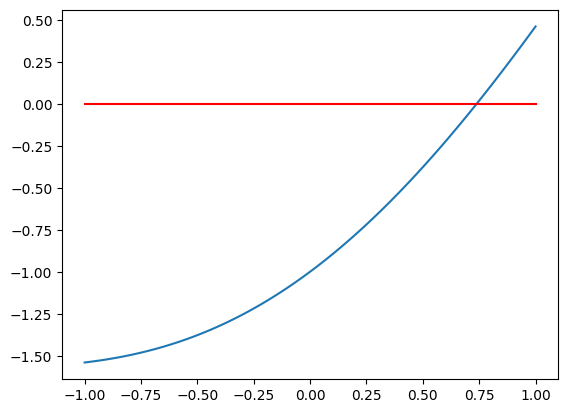

Soluzione: 0.73907470703125


In [167]:
# Metodo di bisezione in intervallo [-1,1]
a = -1; b = 1
x = np.linspace(a, b, 100)
y = x - np.cos(x)
y1 = np.zeros(len(x))

plt.figure()
plt.plot(x, y)
plt.plot(x, y1, color='red')
plt.show()

N = 15
f = lambda x: x - np.cos(x)

def bisezione(f, a, b, N):
    for i in range(N):
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c

sol = bisezione(f, a, b, N)
print(f"Soluzione: {sol}")

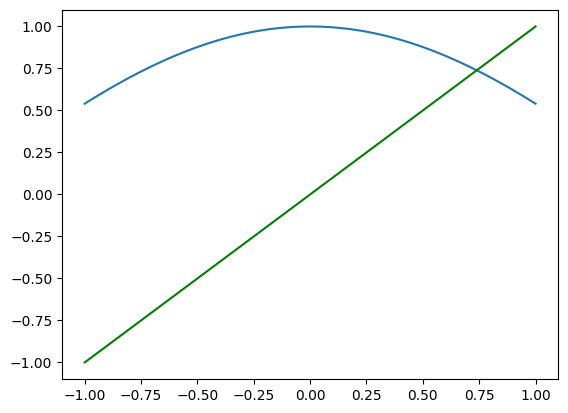

Soluzione: 0.7390822985224024 ottenuta in 29 passaggi


In [168]:
# Metodo del punto fusso
g = lambda x: np.cos(x)
x = np.linspace(-1, 1, 100)
y1 = g(x)
y2 = x

plt.plot(x, y1)
plt.plot(x, y2, 'g')
plt.show()

# tol1 = tolleranza dell'errore residuo |f(x)|
# tol2 = tolleranza sull'incremento |x_n+1 - x_n|
def punto_fisso(f, g, x0, tol1, tol2, MAX_ITER):
    k = 0
    while np.abs(f(x0)) > tol1 and k < MAX_ITER:
        x_new = g(x0)
        if np.abs(x_new - x0) < tol2:
            break
        x0 = x_new
        k += 1
    return (x_new, k)

sol = punto_fisso(f, g, 0, 1e-6, 1e-5, 100)
print(f"Soluzione: {sol[0]} ottenuta in {sol[1]} passaggi")

In [169]:
# Metodo di Newton
df = lambda x: 1 + np.sin(x) # derivata della funzione f(x)

def newton(f, df, x0, tol1, tol2, MAX_ITER):
    k = 0
    while np.abs(f(x0)) > tol1 and k < MAX_ITER:
        x_new = x0 - f(x0) / df(x0)
        if np.abs(x_new - x0) < tol2:
            break
        x0 = x_new
        k += 1
    return (x_new, k)

sol = newton(f, df, 0, 1e-6, 1e-5, 100)
print(f"Soluzione: {sol[0]} ottenuta in {sol[1]} iterazioni")

Soluzione: 0.739085133385284 ottenuta in 4 iterazioni


<b><h3>Metodo del punto fisso con grafici</h3></b>
Ricordiamo che il metodo del punto fisso prevede di utilizzare una <b>successione</b> la quale deve convergere all'effettivo zero di funzione. La successione è costruita mediante <i>x_i = g(x_i-1)</i> che vogliamo far convergere a quel valore definito come <i>x*</i>.

In [170]:
def punto_fisso_grafico(f, g, x_0, E_tol, E_tol2, MAX_ITER):
    x_steps = [x_0]
    y_steps = [g(x_0)]
    k = 0
    x_new = g(x_0)
    while (np.abs(f(x_new)) > E_tol) and (k < MAX_ITER) and (np.abs(x_new - x_0) > E_tol2):
        # Plot del primo segmento verticale da (x_k, y_k) a (x_k, g(x_k))
        x_steps.append(x_new)
        y_steps.append(x_new) # perché y = x
        x_0 = x_new
        x_new = g(x_0)
        # Prendo il massimo valore calcolato con g(x) e lo salvo
        x_steps.append(x_0)
        y_steps.append(x_new)
        k = k + 1
    return x_new, k, np.array(x_steps), np.array(y_steps)

def stampa(start, f, g, g_str: str) -> None:
    zero, iterazione, xs, ys = punto_fisso_grafico(f, g, start, 1.e-6, 1.e-5, 100)
    print(f"f(x) = 0 se x = {zero}")

    x = np.linspace(0, 1.4, 300)
    y = x
    y2 = g(x)
    plt.figure(figsize=(10,6))
    plt.plot(x, y, color='orange', label="y = x")
    plt.plot(x, y2, color='mediumseagreen', label="g(x)")
    plt.plot(xs, ys, color='blue', label="Steps")
    plt.ylabel("y")
    plt.xlabel("x")
    plt.grid(True)
    plt.title(f"Metodo del punto fisso: g(x) = {g_str}")
    plt.legend()
    plt.show()

f(x) = 0 se x = 0.01966265017094853


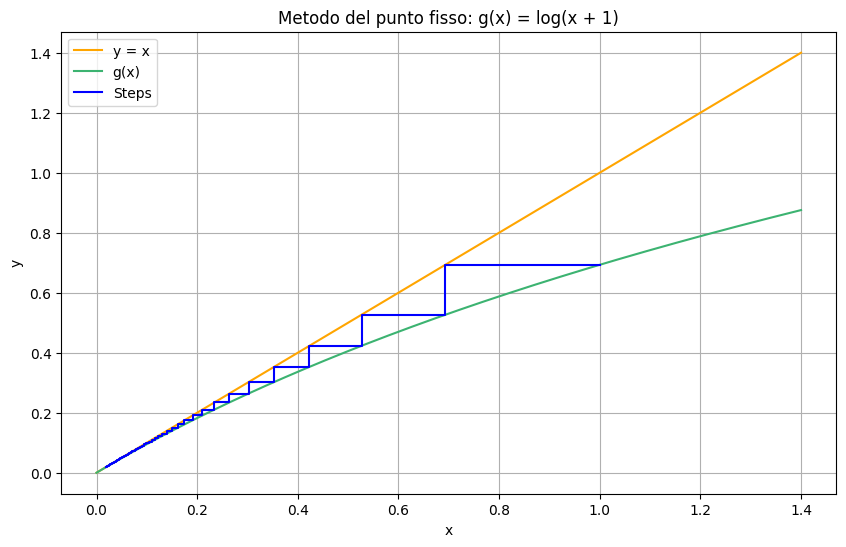

In [171]:
# Esercizio 1
f = lambda x: np.log(x + 1) - x
g = lambda x: np.log(x + 1)
stampa(1, f, g, "log(x + 1)")

f(x) = 0 se x = 0.8241346118528141


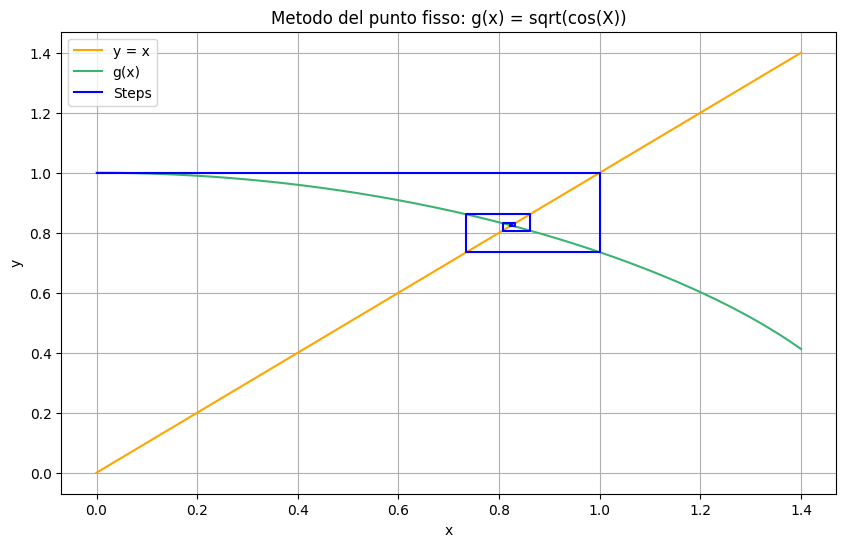

In [172]:
# Esercizio 2
f = lambda x: x**2 - np.cos(x)
g = lambda x: np.sqrt(np.cos(x))
stampa(0, f, g, "sqrt(cos(X))")

f(x) = 0 se x = 1.8954911245569979


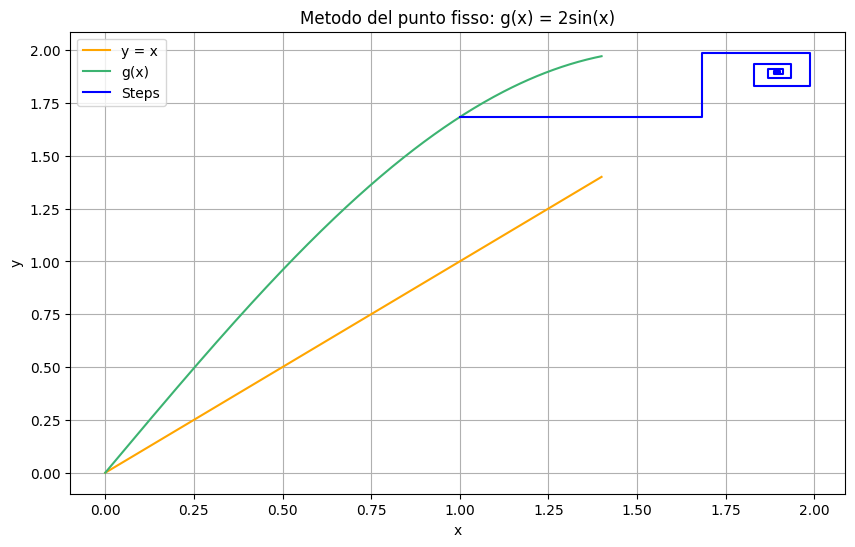

In [173]:
# Esercizio 3
f = lambda x: np.sin(x) - (x/2)
g = lambda x: 2*np.sin(x)
stampa(1, f, g, "2sin(x)")

f(x) = 0 se x = 0.6190731187202185


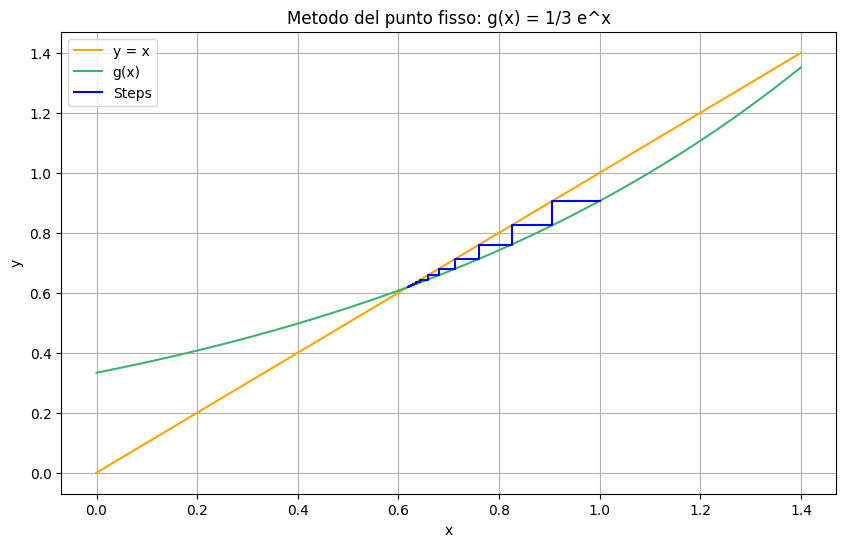

In [174]:
# Esercizio 4
f = lambda x: np.exp(x) - 3*x
g = lambda x: (1/3)*np.exp(x)
stampa(1, f, g, "1/3 e^x")

<b><h3>Metodo di bisezione con grafici</h3></b>
Ricordiamo che il metodo di bisezione funziona in modo simile alla <i>ricerca binaria</i>: si prende un intervallo, lo si divide in due e si verifica in quale delle due metà è contenuto lo zero per poi scegliere tale metà (aggiornando gli estremi dell'intervallo) e anandoci a continuare la ricerca. L'algoritmo si arresta quando <i>|f(m)|</i> è abbastanza vicino all'effettivo zero di funzione.

In [175]:
def bisezione_grafico(f, a, b, E_tol):
    """
        f: funzione
        a, b: estremi dell'intervallo
        E_tol: tolleranza
    """
    k = 0

    # Array per salvare i punti da graficare dopo
    x_steps = []
    y_steps = []
    if a > b:
        a, b = b, a
    E_max = (b - a) / 2
    c = np.nan
    while E_max > E_tol:
        c = (a + b) / 2
        x_steps.append(c)
        if f(a)*f(b) < 0:
            b = c
        else:
            a = c
        y_steps.append(f(c))
        E_max = (b - a) / 2
        k = k + 1
    return c, k, np.array(x_steps), np.array(y_steps)

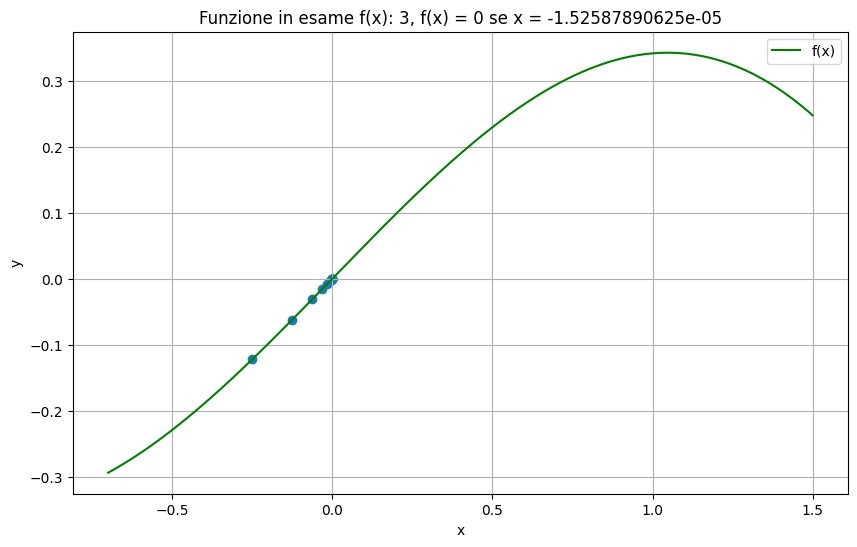

In [176]:
functions = {
    1: lambda x: np.log(x + 1) - x,
    2: lambda x: x**2 - np.cos(x),
    3: lambda x: np.sin(x) - (x/2),
    4: lambda x: np.exp(x) - 3*x
}
nome, f = random.choice(list(functions.items()))
zero, iterazioni, xs, ys = bisezione_grafico(f, -0.5, 0.5, 1.e-5)
x = np.linspace(-0.7, 1.5, 300)
y = f(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='green', label='f(x)')
plt.title(f"Funzione in esame f(x): {nome}, f(x) = 0 se x = {zero}")
plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()


<b><h3>Metodo di Newton con grafici</h3></b>
Stiamo usando la derivata non per trovare lo zero direttamente, ma per stimare meglio dove lo zero si trovi.

La derivata ti dice la pendenza della funzione in un punto. Con quella informazione, puoi tracciare la tangente in quel punto. La tangente è una linea retta, più semplice della curva, e la sua intersezione con l’asse x ti dà una stima più vicina allo zero della funzione.

Poi ripeti il processo: in pratica, la derivata guida il “passo successivo” verso lo zero, rendendo la stima sempre più precisa. Infatti, se si nota dai grafici sotto, si ricomincia a tracciare la retta tangente dal punto esatto nella quale ci siamo arrestati precedentemente (rispetto all'asse x).

In [177]:
def metodo_newton_grafico(f, df, x_0, E_tol, E_tol_2, maxit):
    """
    f: funzione
    df: derivata funzione
    x_0: punto iniziale
    E_tol: prima tolleranza
    E_tol2: seconda tolleranza
    maxit: numero massimo iterazioni
    """
    x_vals = [x_0]
    y_vals = [f(x_0)]
    tangenti = []
    x_new = x_0 - f(x_0)/df(x_0) #primo calcolo per condizione ciclo
    k = 0 #numero di iterazioni
    while np.abs(f(x_new)) > E_tol and k < maxit and np.abs(x_new - x_0) > E_tol_2:
        tangenti.append(((x_vals[-1], f(x_vals[-1])), (x_new, 0))) #semiretta tangente al punto (x_k, f(x_k)) -> parte (x_vals[-1], f(x_vals[-1])
        #(x_new, 0) è l'intersezione con l'asse x
        x_vals.append(x_new)
        y_vals.append(f(x_new))
        x_0 = x_new #salvo
        x_new = x_0 - f(x_0)/df(x_0) #e continuo iterazione. Faccio prima x_0 = x_new perché ho già calcolato fuori dal ciclo la prima iterazione
        k = k + 1
    tangenti.append(((x_vals[-1], f(x_vals[-1])), (x_new, 0))) #aggiunta dell'ultima tangente
    return np.array(x_vals), np.array(y_vals), tangenti


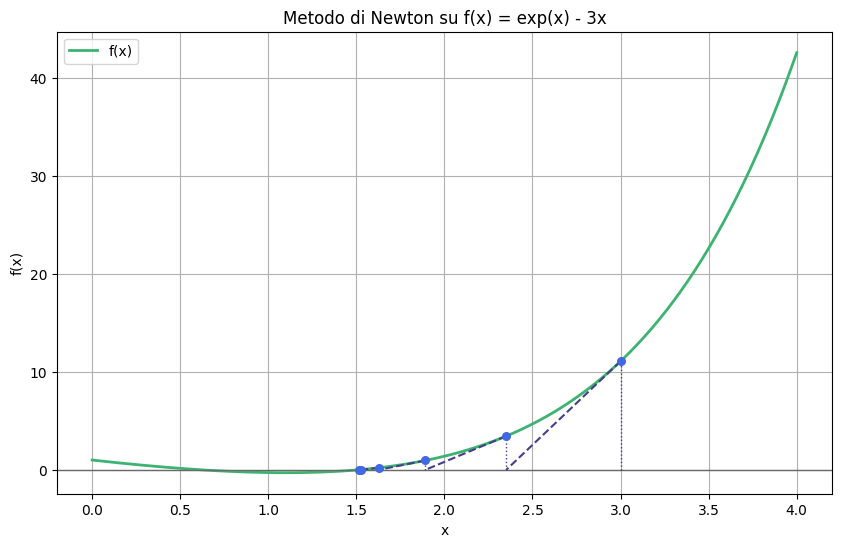

In [178]:
functions = {
    1: lambda x: np.log(x + 1) - x,
    2: lambda x: x**2 - np.cos(x),
    3: lambda x: np.sin(x) - (x/2),
    4: lambda x: np.exp(x) - 3*x
}

derivates = {
    1: lambda x: (1/(x + 1)) - 1,
    2: lambda x: 2*x + np.sin(x),
    3: lambda x: np.cos(x) - (1/2),
    4: lambda x: np.exp(x) - 3
}

names = {
    1: "log(x+1) - x",
    2: "x² - cos(x)",
    3: "sin(x) - x/2",
    4: "exp(x) - 3x"
}

key = random.choice(list(functions.keys()))
f = functions[key]
df = derivates[key]
x_vals, y_vals, tangenti = metodo_newton_grafico(f, df, 3, 1.e-6, 1.e-5, 1000)
x = np.linspace(0, 4, 400)
y = f(x)
plt.figure(figsize=(10, 6))
plt.title(f"Metodo di Newton su f(x) = {names[key]}")
plt.plot(x, y, linewidth = 2,color="mediumseagreen", label='f(x)')
plt.axhline(y = 0, color="dimgrey", linewidth = 1)
# Visualizza le iterazioni e le tangenti
for i in range(len(x_vals) - 1):
    xi = x_vals[i]
    x_next = x_vals[i + 1]
    y_val = y_vals[i]
    plt.plot([xi, xi], [0, y_val], linewidth = 1, linestyle = ":", color = "darkslateblue") #da [xi, xi] a [0, y_val], xi è x_k e y_val è f(x_k)
    plt.plot([xi, x_next], [f(xi), 0], linewidth = 1.5, linestyle = "--", color = "darkslateblue") #riga aggiunta
plt.scatter(x_vals, y_vals, s = 30, color='royalblue', zorder = 2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

<b>Confronti vari:</b> aiutami ad espandere qui

In [179]:
# --- 1. BISEZIONE (con lista errori) ---
def bisezione_history(f, a, b, tol, max_iter):
    errori = [] # Lista per salvare |f(x)|
    
    if f(a) * f(b) >= 0:
        print("Intervallo non valido")
        return None, []
    
    for k in range(max_iter):
        c = (a + b) / 2
        val = f(c)
        errori.append(abs(val)) # Salviamo l'errore corrente
        
        if abs(val) < tol:
            return c, errori
        
        if f(a) * val < 0:
            b = c
        else:
            a = c
            
    return c, errori

# --- 2. PUNTO FISSO (con lista errori) ---
def punto_fisso_history(f, g, x0, tol, max_iter):
    errori = []
    x = x0
    
    for k in range(max_iter):
        errori.append(abs(f(x))) # Errore: quanto f(x) è lontano da 0
        
        if abs(f(x)) < tol:
            return x, errori
            
        x_new = g(x)
        
        # Controllo divergenza (opzionale ma utile)
        if abs(x_new) > 1e10: 
            print("Divergenza!")
            break
            
        x = x_new
        
    return x, errori

# --- 3. NEWTON (con lista errori) ---
def newton_history(f, df, x0, tol, max_iter):
    errori = []
    x = x0
    
    for k in range(max_iter):
        val = f(x)
        errori.append(abs(val))
        
        if abs(val) < tol:
            return x, errori
            
        der = df(x)
        if der == 0:
            print("Derivata nulla!")
            break
            
        x = x - val / der
        
    return x, errori

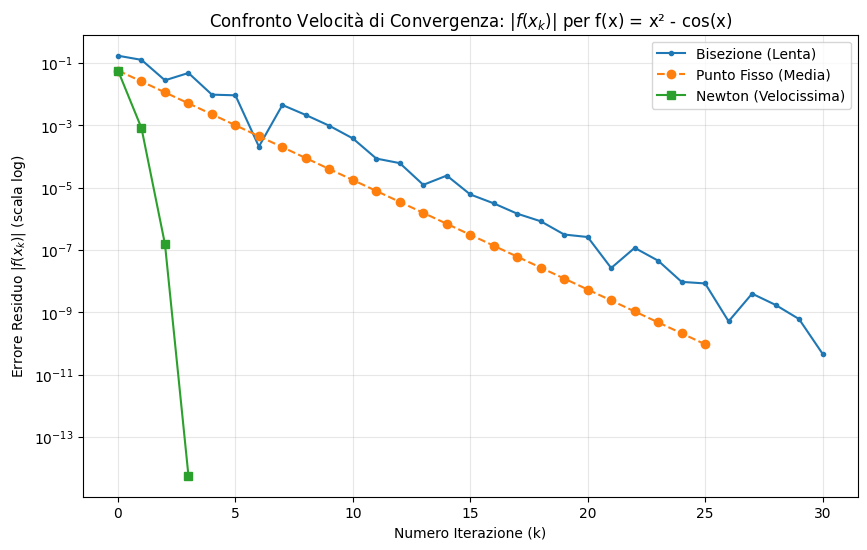

In [180]:
functions = {
    1: lambda x: np.log(x + 1) - x,
    2: lambda x: x**2 - np.cos(x),
    3: lambda x: np.sin(x) - (x/2),
    4: lambda x: np.exp(x) - 3*x
}

derivates = {
    1: lambda x: (1/(x + 1)) - 1,
    2: lambda x: 2*x + np.sin(x),
    3: lambda x: np.cos(x) - (1/2),
    4: lambda x: np.exp(x) - 3
}

names = {
    1: "log(x+1) - x",
    2: "x² - cos(x)",
    3: "sin(x) - x/2",
    4: "exp(x) - 3x"
}

gf = {
    1: lambda x: np.log(x + 1),
    2: lambda x: np.sqrt(np.cos(x)),
    3: lambda x: 2*np.sin(x),
    4: lambda x: (1/3)*np.exp(x)
}

key = random.choice(list(functions.keys()))
f = functions[key]
df = derivates[key]
g = gf[key] # per punto fisso
x_vals, y_vals, tangenti = metodo_newton_grafico(f, df, 3, 1.e-6, 1.e-5, 1000)

# Parametri
tol = 1e-10
max_iter = 50

# --- ESECUZIONE DEI 3 METODI ---
# 1. Bisezione (Intervallo [0.5, 1.0])
zero_bis, err_bis = bisezione_history(f, 0.5, 1.0, tol, max_iter)

# 2. Punto Fisso (Partenza 0.8)
zero_pf, err_pf = punto_fisso_history(f, g, 0.8, tol, max_iter)

# 3. Newton (Partenza 0.8)
zero_newt, err_newt = newton_history(f, df, 0.8, tol, max_iter)

# --- CREAZIONE DEL GRAFICO (Il "Punto 1") ---
plt.figure(figsize=(10, 6))

# Usiamo semilogy perché gli errori diventano piccolissimi velocemente
plt.semilogy(err_bis, label='Bisezione (Lenta)', marker='.', linestyle='-')
plt.semilogy(err_pf, label='Punto Fisso (Media)', marker='o', linestyle='--')
plt.semilogy(err_newt, label='Newton (Velocissima)', marker='s', linestyle='-')

plt.title(f'Confronto Velocità di Convergenza: $|f(x_k)|$ per f(x) = {names[key]}')
plt.xlabel('Numero Iterazione (k)')
plt.ylabel('Errore Residuo $|f(x_k)|$ (scala log)')
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.legend()
plt.show()

Dal grafico osserviamo chiaramente l'ordine di convergenza dei metodi. La Bisezione ha convergenza lineare (l'errore si dimezza a ogni passo). Newton mostra una convergenza quadratica (il numero di cifre corrette raddoppia a ogni passo), raggiungendo la tolleranza $10^{-10}$ in sole 5 iterazioni, contro le oltre 30 della Bisezione.